In [16]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import FramePair
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import matplotlib as mpl
mpl.rcParams['font.size'] = 32
from tqdm.auto import tqdm
from DLC_for_WBFM.utils.postures.centerline_pca import WormFullVideoPosture, WormReferencePosture
from DLC_for_WBFM.utils.pipeline.long_range_matching import initialize_worm_object

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_frames=True)

Output files: /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: False
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [6]:
df_tracklets = project_data.df_all_tracklets
segmentation_metadata = project_data.segmentation_metadata
all_frames = project_data.raw_frames
all_matches = project_data.raw_matches
raw_clust = project_data.raw_clust

In [5]:
frame_pair_options = all_matches[(0, 1)].options

In [11]:
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_K.csv"
fname_X = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_X_coords.csv"
fname_Y = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_Y_coords.csv"

full_posture = WormFullVideoPosture(fname, fname_X, fname_Y)
reference_posture = WormReferencePosture(0, full_posture)

# Initialize TrackedNeurons at 0, and initialize the TrackedWorm
# Get all tracklets that start at t=0
all_tracklet_names = df_tracklets.columns.get_level_values(0).drop_duplicates()

worm_obj = initialize_worm_object(all_tracklet_names, df_tracklets, raw_clust, segmentation_metadata)

  0%|          | 0/16624 [00:00<?, ?it/s]

# Get the set of indices with similar postures

In [12]:
indices_to_check = reference_posture.indices_close_to_reference[1:]
indices_to_check = [i for i in indices_to_check if i < len(all_frames)]

In [13]:
indices_to_check[:10]

[1, 16, 17, 18, 19, 39, 40, 41, 72, 73]

# Match the long-range frames

In [14]:
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import calc_FramePair_from_Frames


In [17]:
all_adjacent_long_range_matches = {}
i_previous = 0
for i_next in tqdm(indices_to_check):
    pair = (i_previous, i_next)
    i_previous = i_next
    anchor_frame = all_frames[pair[0]]
    long_range_frame = all_frames[pair[1]]
    long_range_pair = calc_FramePair_from_Frames(frame0=anchor_frame, frame1=long_range_frame,
                                                 frame_pair_options=frame_pair_options)
    all_adjacent_long_range_matches[pair] = long_range_pair

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [23]:
[m.calc_final_matches() for m in tqdm(all_adjacent_long_range_matches.values())]
project_data.raw_matches.update(all_adjacent_long_range_matches)

# Visualize

In [115]:
# A pair that is very difficult to judge due to rotated posture
pair = (41, 72)

In [123]:
project_data.napari_of_single_match(pair, rigidly_align_volumetric_images=False)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fb0203ccc10>, <Points layer 'n0_zxy' at 0x7fb2683d5250>, <Points layer 'n1_zxy' at 0x7fb020369d50>, <Tracks layer 'final_matches' at 0x7fb020258590>, <Points layer 'Raw IDs' at 0x7fb0200bbe90>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=Fa

In [124]:
project_data.napari_of_single_match(pair, rigidly_align_volumetric_images=True)

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/pyth

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fb0dcda87d0>, <Points layer 'n0_zxy' at 0x7fb02689ad50>, <Points layer 'n1_zxy' at 0x7fb0dcd02210>, <Tracks layer 'final_matches' at 0x7fb0dcc15190>, <Points layer 'Raw IDs' at 0x7fb08caeacd0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=Fa

In [114]:
this_match.print_reason_for_match((11, 31))

.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:asyncio:Exception in callback BaseAsyncIOLoop._handle_events(1114, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(1114, 1)>
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 448, in _handle_events
    self._handle_recv()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 477, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/charles/anaconda3/envs/torc

Found match (11, 31) with confidence 0.17031543930755277
Same match from feature method with confidence: 0.17199150825224715
Neuron not matched using affine method
Different match from gaussian process method: 22 with confidence: 0.10371331502900215
Same match from fdnc (neural network) method with confidence: 0.17031543930755277


/home/charles/Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/utils/feature_detection/class_frame_pair.py:280: RuntimeWarning: coroutine 'get_msg' was never awaited
  return {(n0, n1): c for n0, n1, c in matches}


# Compare to a time-adjacent match

In [104]:
pair2 = (19, 20)

In [121]:
project_data.napari_of_single_match(pair2, rigidly_align_volumetric_images=True)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fb0df336710>, <Points layer 'n0_zxy' at 0x7fb08d1cf0d0>, <Points layer 'n1_zxy' at 0x7fb0df204c90>, <Tracks layer 'final_matches' at 0x7fb0df8f6690>, <Points layer 'Raw IDs' at 0x7fb0df0a6110>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=Fa

In [107]:
match2 = project_data.raw_matches[pair2]

In [108]:
match2.print_candidates_for_neuron(24)

Candidate: (24, 48, 0.16404473141225326)
Candidate: (24, 24, 0.6428518645736653)
Candidate: (24, 24, 0.37601332275602467)


In [109]:
match2.print_candidates_for_neuron(52)

Candidate: (52, 170, 0.14554029549733993)
Candidate: (52, 159, 0.232427112932847)
Candidate: (52, 159, 0.13147291183042129)


In [110]:
match2.print_candidates_for_neuron(155)

Candidate: (155, 159, 0.16361477214813003)
Candidate: (155, 107, 0.5402441601508519)
Candidate: (155, 107, 0.5210786940035103)


In [120]:
match2.calc_final_matches()

[(0, 150, 0.852374758901934),
 (1, 7, 0.7830180184853922),
 (2, 4, 0.8136085475027723),
 (3, 5, 0.7916699080174857),
 (4, 3, 0.8461989362122421),
 (5, 0, 0.8602418809041176),
 (6, 2, 0.8595335940790549),
 (7, 6, 0.8743687756147265),
 (8, 8, 0.8713962875687311),
 (9, 9, 0.23824721066461435),
 (10, 19, 0.836261389198005),
 (11, 13, 0.7611787204259876),
 (12, 20, 0.8824928557050995),
 (13, 16, 0.8045071985916269),
 (14, 12, 0.8947651313547785),
 (15, 10, 0.6225941888986092),
 (16, 23, 0.7963042580340466),
 (17, 50, 0.3136640213644505),
 (18, 22, 0.8302666151482179),
 (19, 17, 0.6795790650538052),
 (20, 21, 0.8549865343442382),
 (21, 11, 0.738175601420146),
 (22, 18, 0.8681962914433063),
 (23, 14, 0.8427190220905658),
 (24, 24, 0.7694039164767803),
 (25, 25, 0.8069627100434412),
 (26, 27, 0.626347632064786),
 (27, 35, 0.8529009534766184),
 (28, 30, 0.7645391224493254),
 (29, 28, 0.8105444093254619),
 (30, 26, 0.8150476239371951),
 (31, 31, 0.8831628382800951),
 (32, 36, 0.8346806736558801)

# Look at a pair with low performance

In [135]:
x = []
y = []
for key, match in tqdm(all_adjacent_long_range_matches.items()):
    x.append(key[0])
    match.calc_final_matches()
    y.append(len(match.final_matches) / match.num_possible_matches)

  0%|          | 0/199 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Matches between similar postures (adjacent mode)')

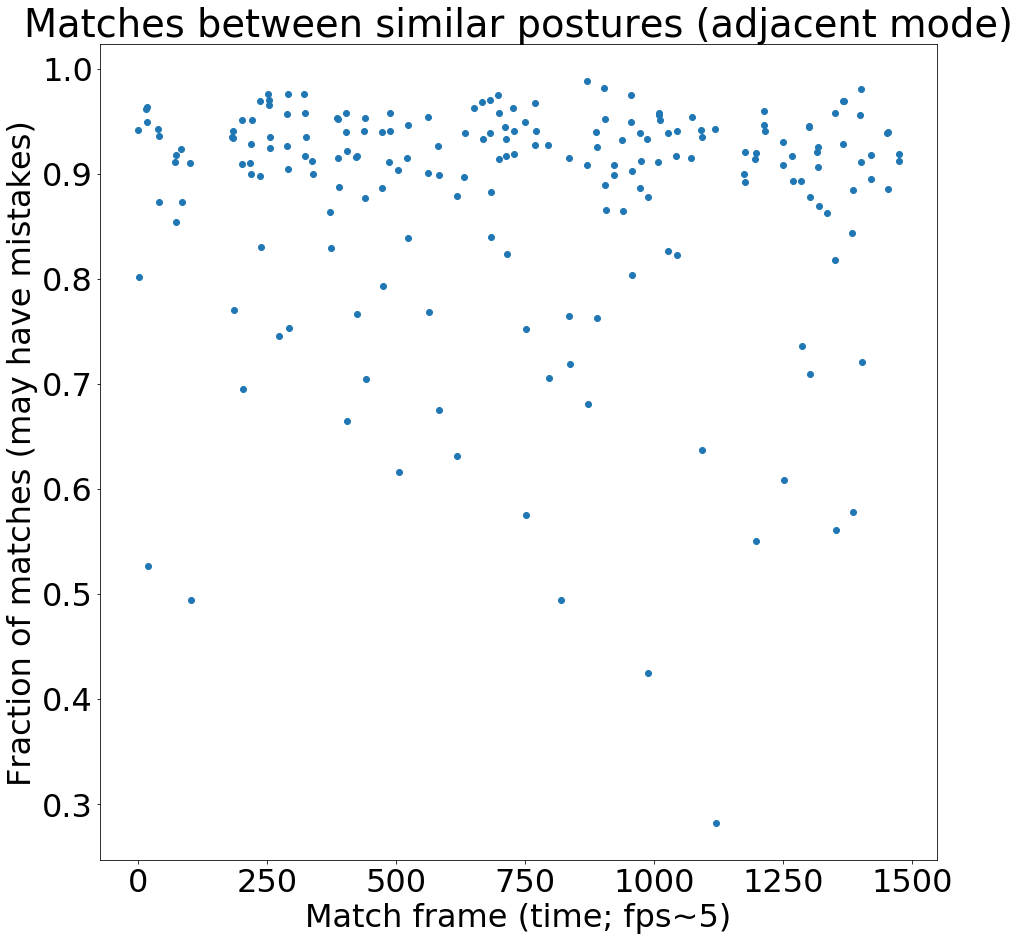

In [136]:
plt.figure(figsize=(15,15))

plt.plot(x, y, 'o')
plt.xlabel("Match frame (time; fps~5)")
plt.ylabel("Fraction of matches (may have mistakes)")
plt.title("Matches between similar postures (adjacent mode)")

In [139]:
m = np.argmin(y)
m, y[m]

(153, 0.28187919463087246)

In [140]:
x[m]

1120

In [130]:
all_adjacent_long_range_matches.keys()

dict_keys([(0, 1), (1, 16), (16, 17), (17, 18), (18, 19), (19, 39), (39, 40), (40, 41), (41, 72), (72, 73), (73, 74), (74, 84), (84, 85), (85, 101), (101, 102), (102, 182), (182, 183), (183, 184), (184, 185), (185, 201), (201, 202), (202, 203), (203, 217), (217, 218), (218, 219), (219, 220), (220, 236), (236, 237), (237, 238), (238, 252), (252, 253), (253, 254), (254, 255), (255, 256), (256, 273), (273, 288), (288, 289), (289, 290), (290, 291), (291, 292), (292, 322), (322, 323), (323, 324), (324, 325), (325, 338), (338, 339), (339, 372), (372, 373), (373, 386), (386, 387), (387, 388), (388, 389), (389, 402), (402, 403), (403, 404), (404, 405), (405, 423), (423, 424), (424, 425), (425, 438), (438, 439), (439, 440), (440, 441), (441, 472), (472, 473), (473, 474), (474, 487), (487, 488), (488, 489), (489, 504), (504, 505), (505, 522), (522, 523), (523, 524), (524, 561), (561, 562), (562, 563), (563, 582), (582, 583), (583, 584), (584, 618), (618, 619), (619, 632), (632, 633), (633, 651),

In [143]:
pair = (1120, 1175)

project_data.napari_of_single_match(pair, rigidly_align_volumetric_images=True)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (-10.859664236579789, 32.51708889450095, 1.0), (-97.79165945043201, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7faff41b4650>, <Points layer 'n0_zxy' at 0x7fb018452e10>, <Points layer 'n1_zxy' at 0x7fafe4d31ed0>, <Tracks layer 'final_matches' at 0x7fafe4c59810>, <Points layer 'Raw IDs' at 0x7fafe4b54150>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, uni

In [142]:
project_data.napari_of_single_match(pair, rigidly_align_volumetric_images=False)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fb018493750>, <Points layer 'n0_zxy' at 0x7fb021f5ea10>, <Points layer 'n1_zxy' at 0x7fb018425290>, <Tracks layer 'final_matches' at 0x7fb018305e50>, <Points layer 'Raw IDs' at 0x7faff43770d0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=Fa

# Match the additional neighboring volumes in similar posture space

In [176]:
bad_pair = (1120, 1175)
additional_candidates = [(1119, 1175), (1120, 1176), (1119, 1176)]

In [189]:
frame_pair_options.min_confidence = 0.001

In [190]:
additional_candidates_matches = {}
i_previous = 0
for pair in tqdm(additional_candidates):
    anchor_frame = all_frames[pair[0]]
    long_range_frame = all_frames[pair[1]]
    long_range_pair = calc_FramePair_from_Frames(frame0=anchor_frame, frame1=long_range_frame,
                                                 frame_pair_options=frame_pair_options)
    additional_candidates_matches[pair] = long_range_pair

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Matches between similar postures (adjacent mode)')

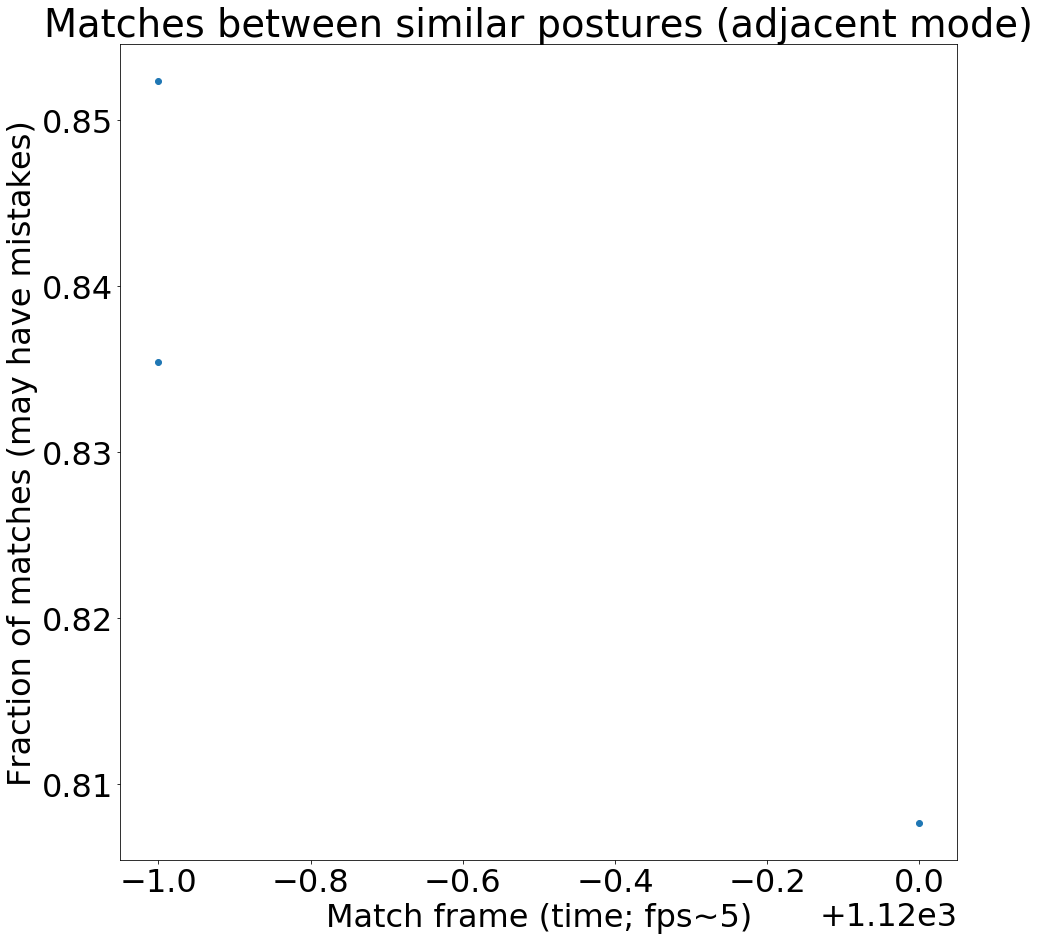

In [191]:
x = []
y = []
for key, match in tqdm(additional_candidates_matches.items()):
    x.append(key[0])
    match.calc_final_matches()
    y.append(len(match.final_matches) / match.num_possible_matches)

plt.figure(figsize=(15,15))

plt.plot(x, y, 'o')
plt.xlabel("Match frame (time; fps~5)")
plt.ylabel("Fraction of matches (may have mistakes)")
plt.title("Matches between similar postures (adjacent mode)")

In [192]:
i = 0
this_pair = additional_candidates[i]
match_to_check = additional_candidates_matches[this_pair]
project_data.napari_of_single_match(this_pair, rigidly_align_volumetric_images=True, this_match=match_to_check);

In [193]:
match_to_check.print_candidates_for_neuron(35)

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/pyth

Candidate: (35, 28, 0.16584736794799584)
Candidate: (35, 32, 0.0675604610640055)


In [195]:
match_to_check.print_reason_for_match((35, 28))

Found match (35, 28) with confidence 0.16434334992922484
Same match as feature method with confidence: 0.16584736794799584
Neuron 35 not matched using affine method
Different match than gaussian process method: 32 with confidence: 0.0675604610640055
Neuron 35 not matched using fdnc (neural network) method


In [196]:
match_to_check.print_candidates_for_neuron(144)

Candidate: (144, 141, 0.13162312367132337)


In [197]:
match_to_check.print_candidates_for_neuron(1)

Candidate: (1, 1, 0.1291221491968067)
Candidate: (1, 2, 0.98989916)


In [184]:
i = 1
this_pair = additional_candidates[i]
match_to_check = additional_candidates_matches[this_pair]

project_data.napari_of_single_match(this_pair, rigidly_align_volumetric_images=True, this_match=match_to_check);

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7faf1ea29790>, <Points layer 'n0_zxy' at 0x7fac8b8d6650>, <Points layer 'n1_zxy' at 0x7faf1e95cf50>, <Tracks layer 'final_matches' at 0x7faf1e865e10>, <Points layer 'Raw IDs' at 0x7faf1e87d410>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=Fa

In [185]:
i = 2
this_pair = additional_candidates[i]
match_to_check = additional_candidates_matches[this_pair]

project_data.napari_of_single_match(this_pair, rigidly_align_volumetric_images=True, this_match=match_to_check);

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (-12.172859201209144, 31.0, 1.0), (-14.325254072818666, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fafaf441e50>, <Points layer 'n0_zxy' at 0x7fafaf703110>, <Points layer 'n1_zxy' at 0x7fafac75be50>, <Tracks layer 'final_matches' at 0x7fafac6d8d10>, <Points layer 'Raw IDs' at 0x7fafac55dbd0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), tex

In [187]:
match_to_check.print_candidates_for_neuron(27)

Candidate: (27, 4, 0.12445842271306573)
Candidate: (27, 22, 0.6514834)


In [186]:
match_to_check.print_reason_for_match((27, 22))

Found match (27, 22) with confidence 0.572667745521458
Neuron not matched using feature method
Neuron not matched using affine method
Different match from gaussian process method: 4 with confidence: 0.12445842271306573
Same match from fdnc (neural network) method with confidence: 0.651483416557312


In [188]:
match_to_check.options

FramePairOptions(embedding_matches_to_keep=1.0, embedding_use_GMS=False, crossCheck=True, add_affine_to_candidates=True, start_plane=4, num_features_per_plane=10000, affine_matches_to_keep=0.8, affine_use_GMS=True, min_matches=20, allow_z_change=False, affine_num_candidates=1, add_gp_to_candidates=True, starting_matches='affine_matches', gp_num_candidates=1, add_fdnc_to_candidates=True, fdnc_options={'cuda': False, 'model_path': '/scratch/zimmer/Charles/github_repos/fDNC_Neuron_ID/model/model.bin', 'topn': 1}, z_threshold=3, min_confidence=0.1, z_to_xy_ratio=3.0, preprocess_using_global_rotation=True)

# Scratch

# Quick check: redo the matches on the pre-rotated data

In [159]:
pair = (1120, 1175)

this_match = project_data.raw_matches[pair]

In [160]:
# Very wrong match; note that there are MANY incorrect matches
this_match.print_reason_for_match((28,40))

Found match (28, 40) with confidence 0.150103346465022
Same match from feature method with confidence: 0.15124616289747264
Neuron not matched using affine method
Different match from gaussian process method: 31 with confidence: 0.07423840196214136
Same match from fdnc (neural network) method with confidence: 0.150103346465022


In [169]:
this_match.print_candidates_for_neuron(28)

Candidate: (28, 40, 0.15124616289747264)
Candidate: (28, 31, 0.07423840196214136)


In [161]:
f0, f1 = this_match.frame0, this_match.frame1
options = frame_pair_options

options.preprocess_using_global_rotation = True
options.add_fdnc_to_candidates = True

In [162]:
options

FramePairOptions(embedding_matches_to_keep=1.0, embedding_use_GMS=False, crossCheck=True, add_affine_to_candidates=True, start_plane=4, num_features_per_plane=10000, affine_matches_to_keep=0.8, affine_use_GMS=True, min_matches=20, allow_z_change=False, affine_num_candidates=1, add_gp_to_candidates=True, starting_matches='affine_matches', gp_num_candidates=1, add_fdnc_to_candidates=True, fdnc_options={'cuda': False, 'model_path': '/scratch/zimmer/Charles/github_repos/fDNC_Neuron_ID/model/model.bin', 'topn': 1}, z_threshold=3, min_confidence=0.1, z_to_xy_ratio=3.0, preprocess_using_global_rotation=True)

In [163]:
new_match = FramePair(options=options, frame0=f0, frame1=f1)
# Do the invididual matches (WITHOUT preprocessing)
new_match.match_using_feature_embedding()
new_match.match_using_local_affine()
new_match.match_using_gp()
new_match.match_using_fdnc()

new_match.calc_final_matches();

  0%|          | 0/32 [00:00<?, ?it/s]

In [168]:
new_match.print_candidates_for_neuron(28)

Candidate: (28, 40, 0.15124616289747264)
Candidate: (28, 31, 0.07423554605802611)
Candidate: (28, 41, 0.99999917)


In [164]:
new_match.preprocess_data()

In [167]:
v = napari.view_image(new_match.dat0, name="Raw 0", colormap='red')
v.add_image(new_match.dat0_preprocessed, name="Rotated 0", colormap='green')
v.add_image(new_match.dat1, name="Raw 1", colormap='blue')

<Image layer 'Raw 1' at 0x7fafd26ceb10>

In [170]:
# Now redo the individual methods
new_match.match_using_feature_embedding()
new_match.match_using_local_affine()
new_match.match_using_gp()
new_match.match_using_fdnc()

new_match.calc_final_matches();

  0%|          | 0/32 [00:00<?, ?it/s]

In [171]:
new_match.print_candidates_for_neuron(28)

Candidate: (28, 40, 0.15124616289747264)
Candidate: (28, 51, 0.06850184203338695)
Candidate: (28, 51, 0.03820456510595883)
Candidate: (28, 41, 0.99988085)


In [155]:
project_data.napari_of_single_match(pair, rigidly_align_volumetric_images=False, this_match=new_match)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fafe56c36d0>, <Points layer 'n0_zxy' at 0x7fb13c709f10>, <Points layer 'n1_zxy' at 0x7faff44120d0>, <Tracks layer 'final_matches' at 0x7fafe56958d0>, <Points layer 'Raw IDs' at 0x7faff4452250>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=Fa

In [172]:
project_data.napari_of_single_match(pair, rigidly_align_volumetric_images=True, this_match=new_match)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (-20.648201469077392, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fafd337ed50>, <Points layer 'n0_zxy' at 0x7fafd23fe990>, <Points layer 'n1_zxy' at 0x7fafd347cd90>, <Tracks layer 'final_matches' at 0x7fb0698d1e50>, <Points layer 'Raw IDs' at 0x7fb13b220d50>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOv

In [173]:
new_match.print_candidates_for_neuron(9)

Candidate: (9, 124, 0.15271691090188055)
Candidate: (9, 70, 0.08888830546506453)
Candidate: (9, 5, 0.44361165)


In [175]:
new_match.print_reason_for_match((9, 5))

Found match (9, 5) with confidence 0.41663365531771707
Different match from feature method: 124 with confidence: 0.15271691090188055
Different match from affine method: 70 with confidence: 0.08888830546506453
Neuron not matched using gaussian process method
Same match from fdnc (neural network) method with confidence: 0.44361165165901184
